![](https://cdn-img.health.com/sites/default/files/styles/medium_16_9/public/styles/main/public/166421106.jpg?itok=m7byxM2V)

As the heart is one of the body’s most essential organs, it is important to understand how to keep it healthy, especially because heart disease is the leading cause of death among both men and women in the U.S.

You can reduce your risk for developing heart disease by learning about the various types of heart disease, understanding the symptoms associated with heart disease and adopting heart-healthy lifestyle strategies.

[For more info](https://www.keckmedicine.org/4-types-of-heart-disease-and-how-to-help-prevent-them/)

### **The Dataset used for this challenge is [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)**

# Ingestion
### Import Libraries

In [1]:
# Import the necessary packages used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))
import warnings
# Remove any warning messages
warnings.filterwarnings("ignore")
# Any results you write to the current directory are saved as output.

['heart.csv']


### Read the dataset and save to variable 'datafr'

In [2]:
datafr = pd.read_csv("../input/heart.csv", error_bad_lines=False)

### Displaying the structure of dataset

In [3]:
# display(datafr.head(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Identifying the shape of the dataset

In [4]:
# Dimension of the datatset
print("Dimension of the dataset is: ",datafr.shape)
# Check if any column has missing value
datafr.isnull().sum()


Dimension of the dataset is:  (303, 14)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Since there are no NaNs here thus we do not require to impute any missing values

### Identify the number of observation for target variable for each class

In [5]:
len(datafr.target[datafr.target==0])

138

In [6]:
len(datafr.target[datafr.target==1])

165

**They are roughly the same so we can use ROC curve as it summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds. <br>
Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds. <br>
ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
<br> [More info](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)**

### Description of each column
* age: age in years
* sex: female=0; male=1
* cp: chest pain type (4 levels)
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results (3 levels)
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy (3 levels)
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: (class variable) with 1 or 0

### Categorical attributes are :-
"cp","fbs", "restecg", "ca", "thal"

### Numeric attributes are :-
"age", "sex", "trestbps", "chol", "thalach", "exang", "oldpeak", "slope"

### Find and Replace Labels

In [7]:
cleanup_nums = {"cp":     {0: "CPType 0", 1: "CPType 1", 2:"CPType 2", 3: "CPType 3"},
                "thal": {1: "Normal", 2: "Fixed Defect", 3: "Reversable Defect" }}
datafr.replace(cleanup_nums, inplace=True)
datafr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,CPType 3,145,233,1,0,150,0,2.3,0,0,Normal,1
1,37,1,CPType 2,130,250,0,1,187,0,3.5,0,0,Fixed Defect,1
2,41,0,CPType 1,130,204,0,0,172,0,1.4,2,0,Fixed Defect,1
3,56,1,CPType 1,120,236,0,1,178,0,0.8,2,0,Fixed Defect,1
4,57,0,CPType 0,120,354,0,1,163,1,0.6,2,0,Fixed Defect,1


# Visualization
### Visualizing the ratio of dataset based on attribute sex

In [8]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

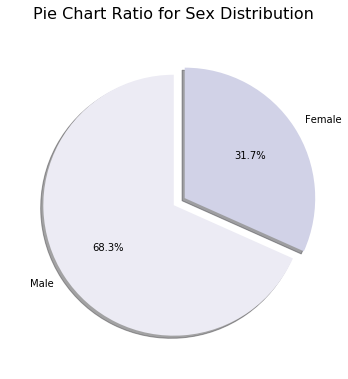

In [9]:
# male =len(datafr[datafr['sex'] == 1])
# female = len(datafr[datafr['sex']== 0])

# # Data to plot
# labels = 'Male','Female'
# sizes = [male,female]

# # Plot
# plt.figure(figsize=(6,6))
# plt.pie(sizes, explode=(0, 0.1), labels=labels, colors=sns.color_palette("Purples"),
# autopct='%1.1f%%', shadow=True, startangle=90)
# plt.title('Pie Chart Ratio for Sex Distribution\n', fontsize=16)
# sns.set_context("paper", font_scale=1.2)

Text(0.5, 1.0, 'BoxPlot for chol')

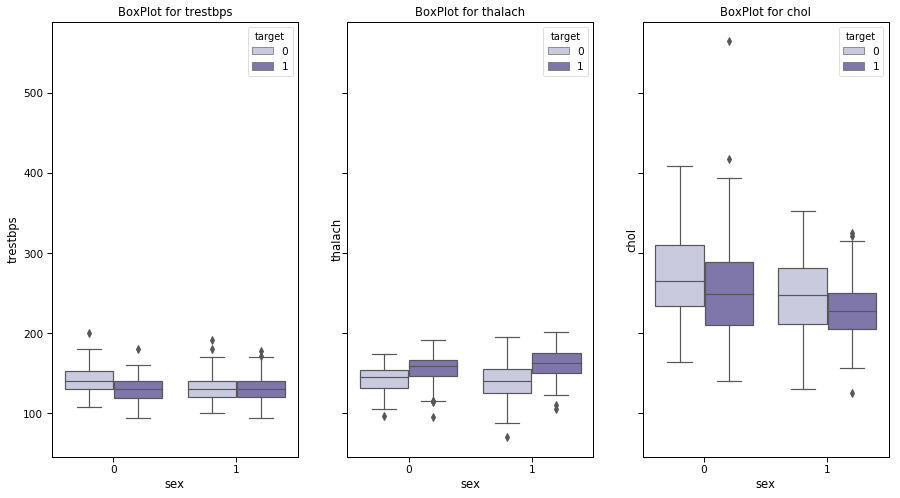

In [10]:
# f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 8))
# sns.boxplot(x="sex", y="trestbps", hue="target", data=datafr, palette='Purples', ax=axes[0])
# axes[0].set_title('BoxPlot for {}'.format("trestbps"))
# sns.boxplot(x="sex", y="thalach", hue="target", data=datafr, palette='Purples', ax=axes[1])
# axes[1].set_title('BoxPlot for {}'.format("thalach"))
# sns.boxplot(x="sex", y="chol", hue="target", data=datafr, palette='Purples', ax=axes[2])
# axes[2].set_title('BoxPlot for {}'.format("chol"))

### Plot displaying male and female with potential heart disease based on age

<Figure size 432x432 with 0 Axes>

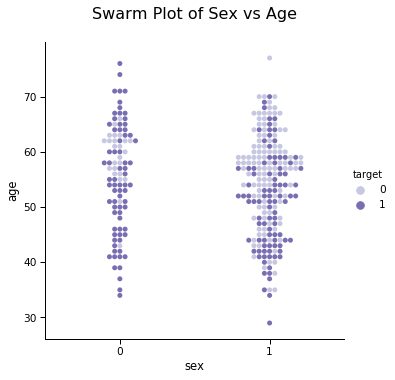

In [11]:
# plt.figure(figsize=(6,6))
# sns.catplot(x="sex", y="age", hue="target", kind="swarm", data=datafr, palette='Purples')
# plt.title('Swarm Plot of Sex vs Age\n', fontsize=16)
# sns.set_context("paper", font_scale=1.2)

### Visualizing the ratio of different chest pain types in the dataset

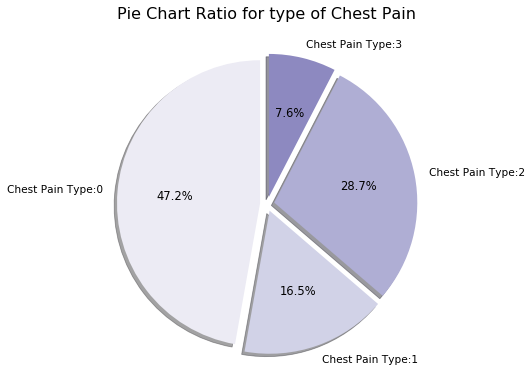

In [12]:
# # Data to plot
# labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
# sizes = [len(datafr[datafr['cp'] == "CPType 0"]),len(datafr[datafr['cp'] == "CPType 1"]),
#          len(datafr[datafr['cp'] == "CPType 2"]),
#          len(datafr[datafr['cp'] == "CPType 3"])]

# plt.figure(figsize=(6,6))

# # Plot
# plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05), labels=labels, colors=sns.color_palette("Purples"),
# autopct='%1.1f%%', shadow=True, startangle=90)
# plt.title('Pie Chart Ratio for type of Chest Pain\n', fontsize=16)
# sns.set_context("paper", font_scale=1.2)

# plt.axis('equal')
# plt.show()

### Plot displaying potential of heart disease based on various levels of chest pain types by age

<Figure size 432x432 with 0 Axes>

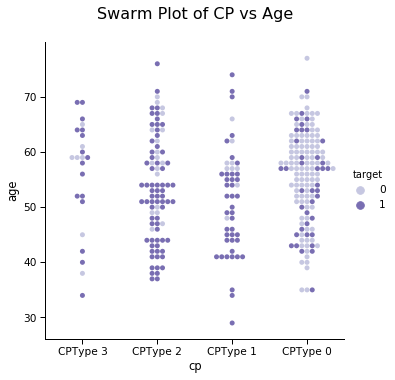

In [13]:
# plt.figure(figsize=(6,6))
# sns.catplot(x="cp", y="age", hue="target", kind="swarm", data=datafr, palette='Purples')
# plt.title('Swarm Plot of CP vs Age\n', fontsize=16)
# sns.set_context("paper", font_scale=1.2)

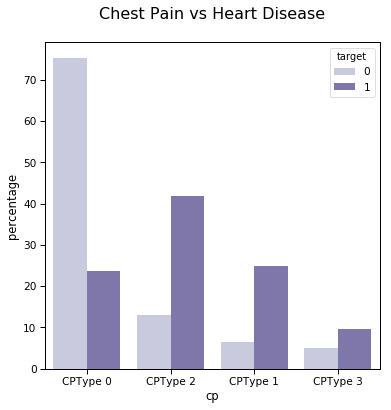

In [14]:
# """
# Normalizing the values and then making it as a DataFrame and then plotting using sns.barplot.
# """
# plt.figure(figsize=(6,6))
# temp = (datafr.groupby(['target']))['cp'].value_counts(normalize=True)\
# .mul(100).reset_index(name = "percentage")
# sns.barplot(x = "cp", y = "percentage", hue = "target", data = temp, palette='Purples')\
# .set_title("Chest Pain vs Heart Disease\n", fontsize=16)
# sns.set_context("paper", font_scale=1.2)

### Visualizing the ratio of dataset based on (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

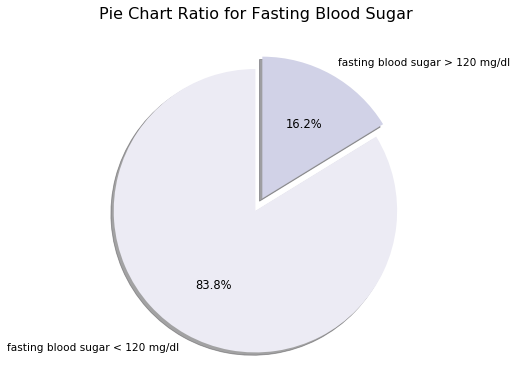

In [15]:
# # Data to plot
# labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
# sizes = [len(datafr[datafr['fbs'] == 0]),len(datafr[datafr['cp'] == "CPType 1"])]

# plt.figure(figsize=(6,6))
 
# # Plot
# plt.pie(sizes, explode=(0.05, 0.05), labels=labels, colors=sns.color_palette("Purples"),
# autopct='%1.1f%%', shadow=True, startangle=90)
# plt.title('Pie Chart Ratio for Fasting Blood Sugar\n', fontsize=16)
# sns.set_context("paper", font_scale=1.2)
 
# plt.axis('equal')
# plt.show()   

### Checking the distribution of feature 'thalach: maximum heart rate achieved'

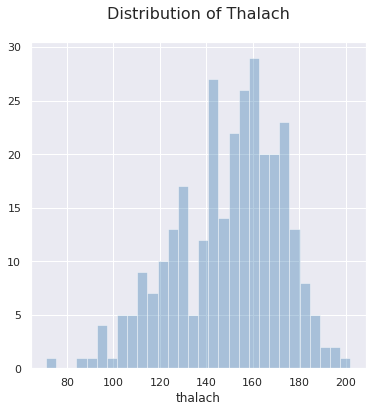

In [16]:
# sns.set(style="darkgrid")
# plt.figure(figsize=(6,6))
# sns.distplot(datafr['thalach'],kde=False,bins=30,color='steelblue')
# plt.title('Distribution of Thalach\n', fontsize=16)
# sns.set_context("paper", font_scale=1.4)

The distribution is normal indicating most population fall between 140-180 with some left tail indicating few outliers which we can validate once we create a scatterplot  with residuals, leverage and cook's distance.

### Checking the distribution of feature 'chol: serum cholestoral in mg/dl'

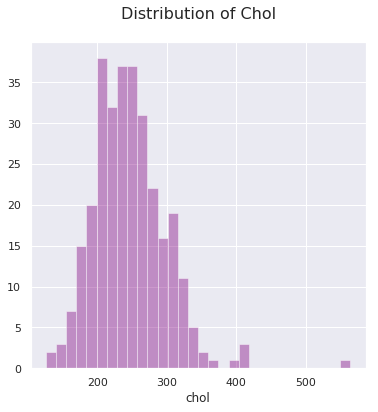

In [17]:
# sns.set(style="darkgrid")
# plt.figure(figsize=(6,6))
# sns.distplot(datafr['chol'],kde=False,bins=30,color="purple")
# plt.title('Distribution of Chol\n', fontsize=16)
# sns.set_context("paper", font_scale=1.4)

The distribution is normal indicating most population falls between 200-300 which some right tail indicating few outliers which we can validate once we create a scatterplot with residuals, leverage and cook's distance.

### Visualizing the distribution of people having heart disease based on age

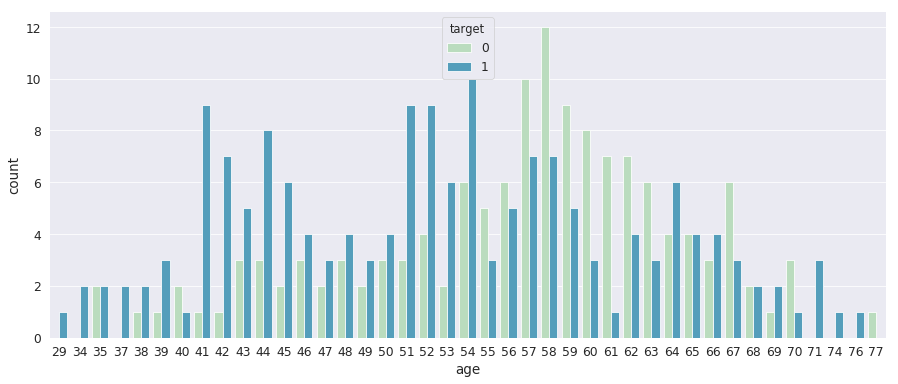

In [18]:
# plt.figure(figsize=(15,6))
# sns.countplot(x='age',data = datafr, hue = 'target',palette='GnBu')
# sns.set_context("paper", font_scale=1.4)
# plt.show()

# Data Preparation

### One-Hot Encoding categorical variables

In [19]:
datafr = pd.get_dummies(datafr, columns=["cp", "thal"])
datafr.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,cp_CPType 0,cp_CPType 1,cp_CPType 2,cp_CPType 3,thal_0,thal_Fixed Defect,thal_Normal,thal_Reversable Defect
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,0,1,0,0,1,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,2,0,1,0,1,0,0,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,1,0,1,0,0,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,1,0,0,0,0,1,0,0


### Splitting the dataset into test and train

In [20]:
# Predictor variables
X= datafr.drop('target',axis=1)
# Target or Class variable
Y=datafr['target']

In [21]:
# Let's using scikit learn to split our dataset
from sklearn.model_selection import train_test_split
# Using 70:30 ratio for train:test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=400)

In [22]:
X_train.shape

(212, 19)

In [23]:
X_test.shape

(91, 19)

### Preprocessing and Cleaning

In [24]:
# Using StandardScaler to scale features
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# In the given dataset categorical features are already one-hot encoded, thus we do not reuqire to one-hot encode them
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# Modeling
### Define a cross-validation function
We are using cross-validation to predict our training accuracy in order to avoid underfitting and overfitting of our model. The closer the results of cross-validation accracy and test accuracy will determine the ideal fit of our model.

In [25]:
from sklearn.model_selection import cross_val_score
# Using 10 folds cross-validation
def CrossVal(trainX,trainY,model):
    accuracy=cross_val_score(model,trainX , trainY, cv=10, scoring='accuracy')
    return(accuracy)

### 1) Using our first Machine Learning Approach: SVM

In [26]:
# Start with Support Vector Machine for Binary Classification
from sklearn import svm
clf = svm.SVC(gamma='scale', probability=True)
# Creare a model with X_train and Y_train data
clf.fit(X_train,Y_train)
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]


In [27]:
# Run the model on X_test to predict the target labels. Use cross-validation accuracy to check if model overfits or underfits
predict1 = clf.predict(X_test)
clf=svm.SVC(C=0.2,probability=True,kernel='rbf',gamma='scale')
score_clf=CrossVal(X_train,Y_train,clf)
print("Cross-Validation accuracy is {:.2f}%".format(score_clf.mean()*100))

Cross-Validation accuracy is 83.57%


Test Accuracy using SVM Model: 83.52%


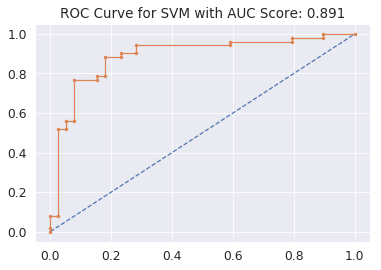

Text(0.5, 1.0, 'F1 Score for SVM model is 0.86')

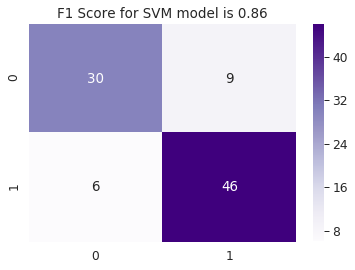

In [28]:
# # Compare the predicted target labels with Y_test
# from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
# print("Test Accuracy using SVM Model: {:.2f}%".format(accuracy_score(Y_test,predict1)*100))
# # assign cnf_matrix with result of confusion_matrix array
# cnf_matrix = confusion_matrix(Y_test,predict1)

# # calculate AUC
# auc_svm = roc_auc_score(Y_test, probs)
# #print('AUC: %.3f' % auc)
# # calculate roc curve
# fpr, tpr, thresholds = roc_curve(Y_test, probs)
# # plot no skill
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(fpr, tpr, marker='.')
# plt.title("ROC Curve for SVM with AUC Score: {:.3f}".format(auc_svm))
# # show the plot
# plt.show()

# #create a heat map
# sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
# svm_f1=f1_score(Y_test,predict1)
# plt.title('F1 Score for SVM model is {:.2f}'.format(svm_f1))

### 2) Using our second Machine Learning Approach: Random Forest

In [29]:
# Next we take Random Forest Model (Ensemble) for Binary Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 13,random_state = 40)
# Creare a model with X_train and Y_train data
rf.fit(X_train,Y_train)
# predict probabilities
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [30]:
# Run the model on X_test to predict the target labels. Use cross-validation accuracy to check if model overfits or underfits
predict2 = rf.predict(X_test)
rf=RandomForestClassifier(n_estimators=13, n_jobs=-1, random_state=40)
score_rf= CrossVal(X_train,Y_train,rf)
print('Cross-Validation accuracy is {:.2f}%'.format(score_rf.mean()*100))

Cross-Validation accuracy is 80.14%


Accuracy using Random Forest Model: 82.42%


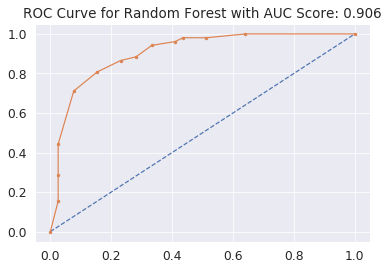

Text(0.5, 1.0, 'F1 Score for Random Forest model is 0.85')

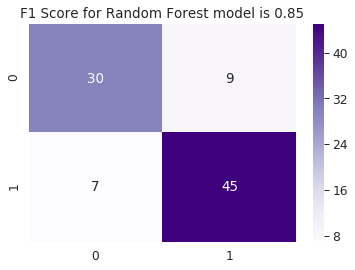

In [31]:
# # Compare the predicted target labels with Y_test
# from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
# print("Accuracy using Random Forest Model: {:.2f}%".format(accuracy_score(Y_test,predict2)*100))
# # assign cnf_matrix with result of confusion_matrix array
# cnf_matrix = confusion_matrix(Y_test,predict2)

# # calculate AUC
# auc_rf = roc_auc_score(Y_test, probs)
# #print('AUC: %.3f' % auc)
# # calculate roc curve
# fpr, tpr, thresholds = roc_curve(Y_test, probs)
# # plot no skill
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(fpr, tpr, marker='.')
# plt.title("ROC Curve for Random Forest with AUC Score: {:.3f}".format(auc_rf))
# # show the plot
# plt.show()

# #create a heat map
# sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
# rf_f1=f1_score(Y_test,predict2)
# plt.title('F1 Score for Random Forest model is {:.2f}'.format(rf_f1))

### 3) Using our third Machine Learning Approach: Logistic Regression

In [32]:
# Next we take Logistic Regression for Binary Classification
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(class_weight='balanced', tol=1e-10)

# Creare a model with X_train and Y_train data
logit.fit(X_train,Y_train)
# predict probabilities
probs = logit.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [33]:
# Run the model on X_test to predict the target labels. Use cross-validation accuracy to check if model overfits or underfits
predict3 = logit.predict(X_test)
score_logit= CrossVal(X_train,Y_train,logit)
print('Cross-Validation accuracy is {:.2f}%'.format(score_logit.mean()*100))

Cross-Validation accuracy is 81.68%


Accuracy using Logistic Regression Model: 79.12%


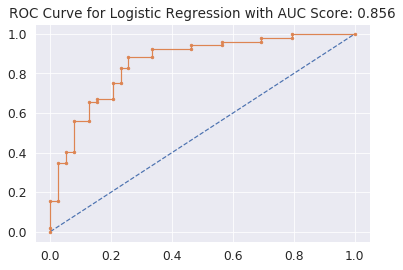

Text(0.5, 1.0, 'F1 Score for Logistic Regression model is 0.82')

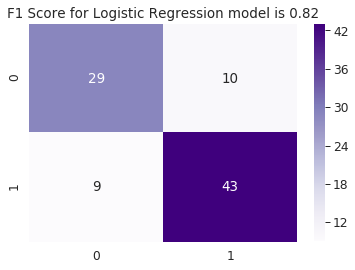

In [34]:
# # Compare the predicted target labels with Y_test
# from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
# print("Accuracy using Logistic Regression Model: {:.2f}%".format(accuracy_score(Y_test,predict3)*100))
# # assign cnf_matrix with result of confusion_matrix array
# cnf_matrix = confusion_matrix(Y_test,predict3)

# # calculate AUC
# auc_lr = roc_auc_score(Y_test, probs)
# #print('AUC: %.3f' % auc)
# # calculate roc curve
# fpr, tpr, thresholds = roc_curve(Y_test, probs)
# # plot no skill
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(fpr, tpr, marker='.')
# plt.title("ROC Curve for Logistic Regression with AUC Score: {:.3f}".format(auc_lr))
# # show the plot
# plt.show()

# #create a heat map
# sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
# logit_f1=f1_score(Y_test,predict3)
# plt.title('F1 Score for Logistic Regression model is {:.2f}'.format(logit_f1))

### 4) Using our forth Machine Learning Approach: KNN
In order to identify the ideal number of neighbours for KNN, we first calculate the error percentage each neighbour might result in. The lower the error the better our model fits on that current set of neighbours.

In [35]:
# Next we take KNN Classifier for Binary Classification
from sklearn.neighbors import KNeighborsClassifier

# Create an empty list to hold error values
error = []

# Calculating error for K values between 1 and 30
for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

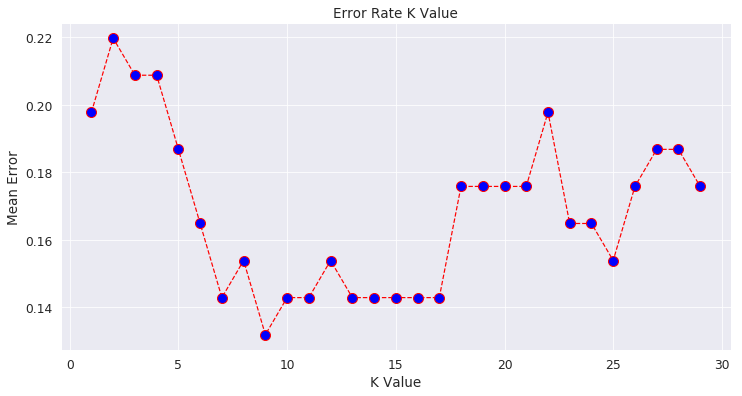

In [36]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

From the above figure we can see that we get a minimum error of around 0.14 when k is either 9 or 12.

In [37]:
knn=KNeighborsClassifier(algorithm='auto',n_neighbors= 9)
# Creare a model with X_train and Y_train data
knn.fit(X_train,Y_train)
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [38]:
# Run the model on X_test to predict the target labels. Use cross-validation accuracy to check if model overfits or underfits
predict4 = knn.predict(X_test)
score_knn= CrossVal(X_train,Y_train,knn)
print('Cross-Validation accuracy is {:.2f}%'.format(score_knn.mean()*100))

Cross-Validation accuracy is 84.48%


Accuracy using K Nearest Neighbours Model: 86.81%


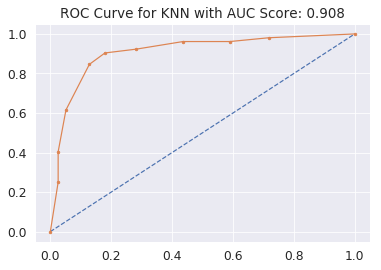

Text(0.5, 1.0, 'F1 Score for K Nearest Neighbour model is 0.89')

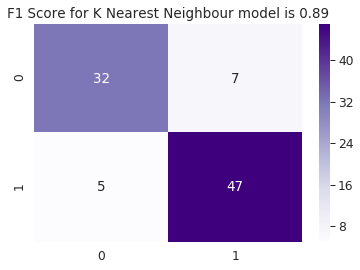

In [39]:
# # Compare the predicted target labels with Y_test
# from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
# print("Accuracy using K Nearest Neighbours Model: {:.2f}%".format(accuracy_score(Y_test,predict4)*100))
# # assign cnf_matrix with result of confusion_matrix array
# cnf_matrix = confusion_matrix(Y_test,predict4)

# # calculate AUC
# auc_knn = roc_auc_score(Y_test, probs)
# #print('AUC: %.3f' % auc)
# # calculate roc curve
# fpr, tpr, thresholds = roc_curve(Y_test, probs)
# # plot no skill
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(fpr, tpr, marker='.')
# plt.title("ROC Curve for KNN with AUC Score: {:.3f}".format(auc_knn))
# # show the plot
# plt.show()

# #create a heat map
# sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
# knn_f1=f1_score(Y_test,predict4)
# plt.title('F1 Score for K Nearest Neighbour model is {:.2f}'.format(knn_f1))

### 5) Using our fifth Machine Learning Approach: AdaBoost

In [40]:
# Next we take AdaBoost for Binary Classification
from sklearn.ensemble import AdaBoostClassifier
# Using Random Forest model 'rf' for boosting
ada=AdaBoostClassifier(rf,n_estimators=100, random_state=40, learning_rate=0.1)
# Creare a model with X_train and Y_train data
ada.fit(X_train,Y_train)
# predict probabilities
probs = ada.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [41]:
# Run the model on X_test to predict the target labels. Use cross-validation accuracy to check if model overfits or underfits
predict5 = ada.predict(X_test)
score_ada= CrossVal(X_train,Y_train,ada)
print('Cross-Validation accuracy is {:.2f}%'.format(score_ada.mean()*100))

Cross-Validation accuracy is 81.62%


Accuracy using AdaBoost Model: 81.32%


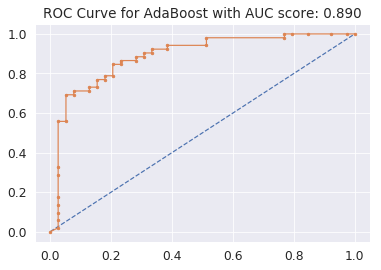

Text(0.5, 1.0, 'F1 Score for AdaBoost model is 0.84')

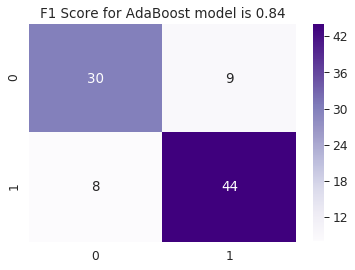

In [42]:
# # Compare the predicted target labels with Y_test
# from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
# print("Accuracy using AdaBoost Model: {:.2f}%".format(accuracy_score(Y_test,predict5)*100))
# # assign cnf_matrix with result of confusion_matrix array
# cnf_matrix = confusion_matrix(Y_test,predict5)

# # calculate AUC
# auc_ada = roc_auc_score(Y_test, probs)
# #print('AUC: %.3f' % auc)
# # calculate roc curve
# fpr, tpr, thresholds = roc_curve(Y_test, probs)
# # plot no skill
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(fpr, tpr, marker='.')
# plt.title("ROC Curve for AdaBoost with AUC score: {:.3f}".format(auc_ada))
# # show the plot
# plt.show()

# #create a heat map
# sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
# ada_f1=f1_score(Y_test,predict5)
# plt.title('F1 Score for AdaBoost model is {:.2f}'.format(ada_f1))

# Conclusion

Text(0.5, 1.0, 'Performance based on AUC Score')

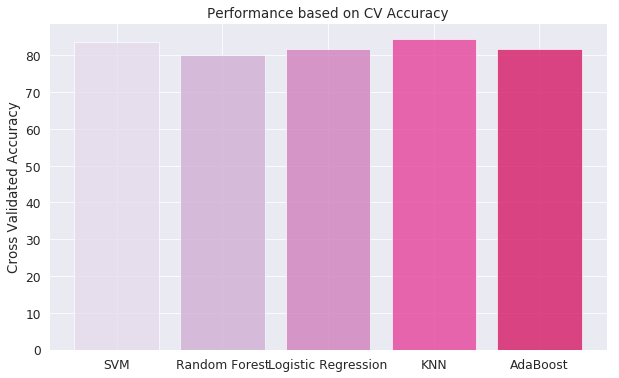

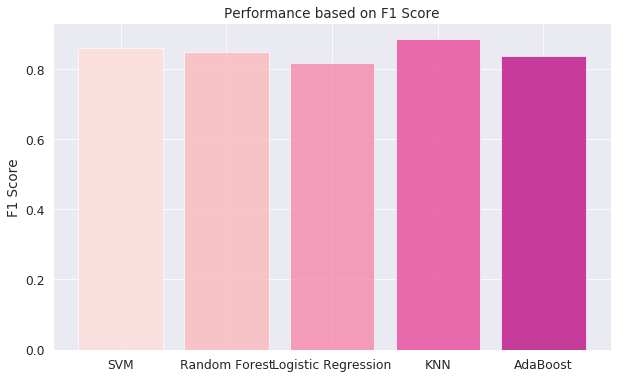

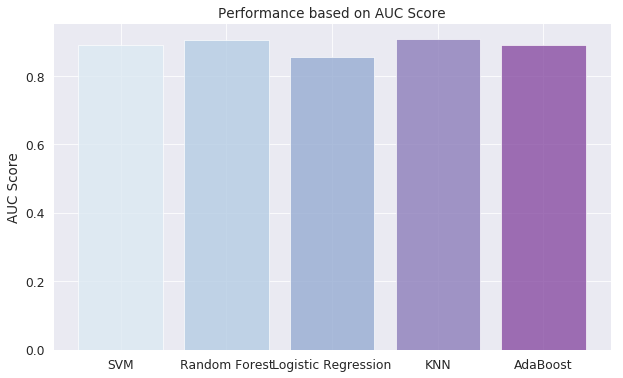

In [43]:
# cv_svm = score_clf.mean()*100
# cv_rf = score_rf.mean()*100
# cv_lr = score_logit.mean()*100
# cv_knn = score_knn.mean()*100
# cv_ada = score_ada.mean()*100
# # Cross Validation Accuracy list for all models
# cv = [cv_svm, cv_rf, cv_lr, cv_knn, cv_ada]
# # F1 Score list for all models
# f1 = [svm_f1, rf_f1, logit_f1, knn_f1, ada_f1]
# # AUC Score list for all models
# auc = [auc_svm, auc_rf, auc_lr, auc_knn, auc_ada]
# # Name List of ML Models used
# models = ['SVM', 'Random Forest', 'Logistic Regression', 'KNN', 'AdaBoost']
# y_pos = np.arange(len(models)) #Position = 0,1,2,3,4

# # Plot Cross Validation Accuracy
# plt.figure(figsize=(10, 6))  
# plt.bar(y_pos, cv, align='center', alpha=0.8, color=sns.color_palette("PuRd"))
# plt.xticks(y_pos, models)
# plt.ylabel('Cross Validated Accuracy')
# plt.title('Performance based on CV Accuracy')

# # Plot F1 Score
# plt.figure(figsize=(10, 6))  
# plt.bar(y_pos, f1, align='center', alpha=0.8, color=sns.color_palette("RdPu"))
# plt.xticks(y_pos, models)
# plt.ylabel('F1 Score')
# plt.title('Performance based on F1 Score')

# # Plot AUC Score
# plt.figure(figsize=(10, 6))  
# plt.bar(y_pos, auc, align='center', alpha=0.8, color=sns.color_palette("BuPu"))
# plt.xticks(y_pos, models)
# plt.ylabel('AUC Score')
# plt.title('Performance based on AUC Score')


**Based on the above two comparison plots: Cross-Validated Accuracy and F1 Score, K Nearest Neighbours (KNN) seems to have an ideal balance between underfitting and overfitting along with a high F1 Score. KNN also outperforms the competition with the highest test accuracy of 86.81% and AUC Score of 0.908. <br> Thus out of the 5 models used above KNN will be our choice of selection.**

### How to take care of your heart: <br>
These simple steps can greatly reduce your risk of developing heart disease:

1. Eating a heart-healthy diet that includes fruits, vegetables, whole grains and fish
1. Engaging in at least 30 minutes of moderate aerobic activity per day
1. Maintaining a healthy weight
1. Quitting smoking
1. Taking necessary medications for hypertension, diabetes or high cholesterol if directed by your physician

![Visit Keck Medicine of USC](https://www.keckmedicine.org/wp-content/uploads/2018/02/USC-17365_CVTIinfographic_170914.jpg)